In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
#from sklearn import cross_validation
from sklearn.feature_selection import RFE
from sklearn.cross_validation import train_test_split,KFold,cross_val_score
from sklearn import metrics

/home/devendra/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
total_df = pd.read_csv('spanish.AudioFeatures.csv')
#X = np.array(total_df.ix[0:, 1:28])
X1 = np.array(np.log(total_df["pcm_intensity"]))
X2 = np.array(total_df.ix[0:, 2:27])
X3 = np.array(np.log(total_df["pcm_RMSenergy"]))


X = np.column_stack((X1,X2,X3))
#X = np.column_stack((X1,X2))
#X = X.drop(X.columns[[4,5,8,11 ]], axis=1)
y = np.array(total_df.ix[0:, -1:])

X_train = X[0:400]
y_train = y[0:400]
X_test = X[400:440]
y_test = y[400:440]

#print(y.ravel())

In [3]:
#X = total_df.drop(total_df.columns[[4,5,8,11 ]], axis=1)
#print(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), random_state=4)

# check classification accuracy of svm 
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)
print(len(y_pred))
print("SVC with rbf kernel",metrics.accuracy_score(y_test, y_pred))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
110
SVC with rbf kernel 0.554545454545


In [5]:
clf = svm.SVC()
clf.fit(X_train, y_train.ravel())

y_pred=np.array(clf.predict(X_test))
#print (y_pred)
#print (clf.get_params())
print("SVC with rbf kernel",metrics.accuracy_score(y_test, y_pred))

SVC with rbf kernel 0.554545454545


In [6]:
clf = svm.SVC()
scores = cross_val_score(clf, X, y.ravel(), cv=10, scoring='accuracy')
print(scores)
print("SVC with rbf kernel",scores.mean())

[ 0.55555556  0.55555556  0.54545455  0.54545455  0.54545455  0.54545455
  0.54545455  0.54545455  0.55813953  0.55813953]
SVC with rbf kernel 0.550011745361


In [7]:
clf = svm.SVC(kernel='sigmoid')
scores = cross_val_score(clf, X, y.ravel(), cv=10, scoring='accuracy')
print(scores)
print("SVC with sigmoid kernel",scores.mean())

[ 0.55555556  0.66666667  0.56818182  0.54545455  0.54545455  0.54545455
  0.54545455  0.59090909  0.58139535  0.55813953]
SVC with sigmoid kernel 0.570266619685


In [8]:
clf = svm.LinearSVC()
scores = cross_val_score(clf, X, y.ravel(), cv=10, scoring='accuracy')
print(scores)
print("SVC with linear kernel, number of iterations = 1000",scores.mean())

[ 0.46666667  0.55555556  0.47727273  0.54545455  0.56818182  0.52272727
  0.43181818  0.36363636  0.51162791  0.39534884]
SVC with linear kernel, number of iterations = 1000 0.48382898755


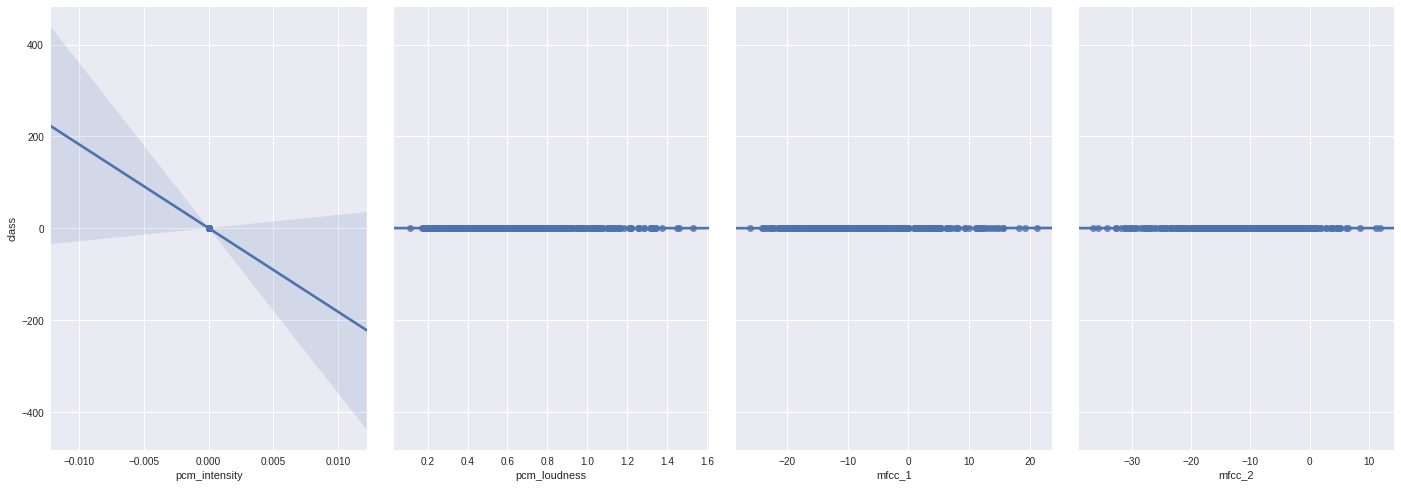

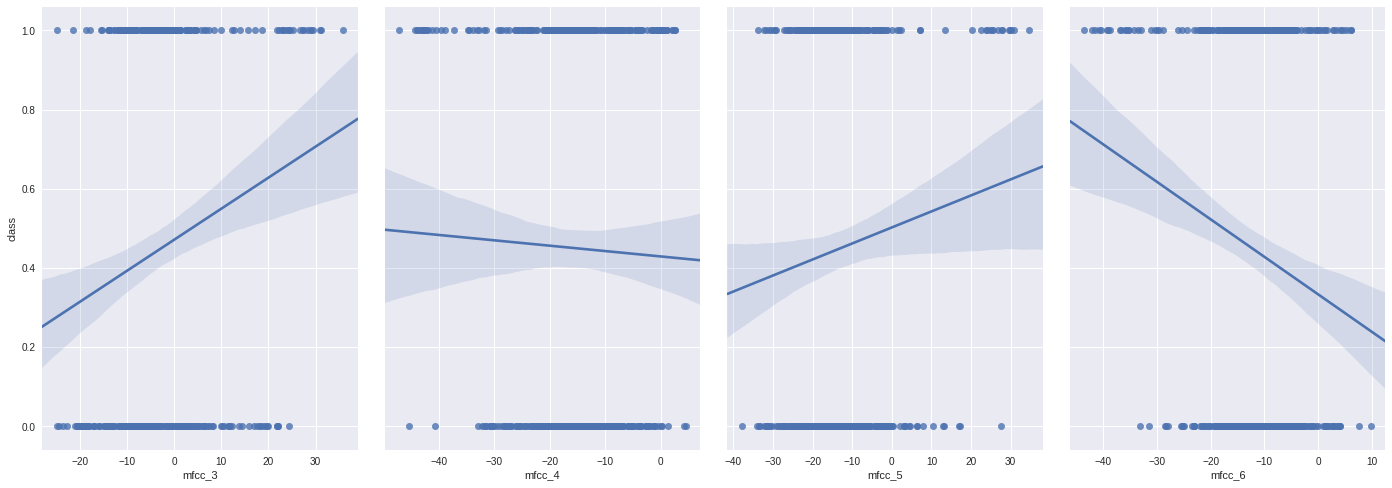

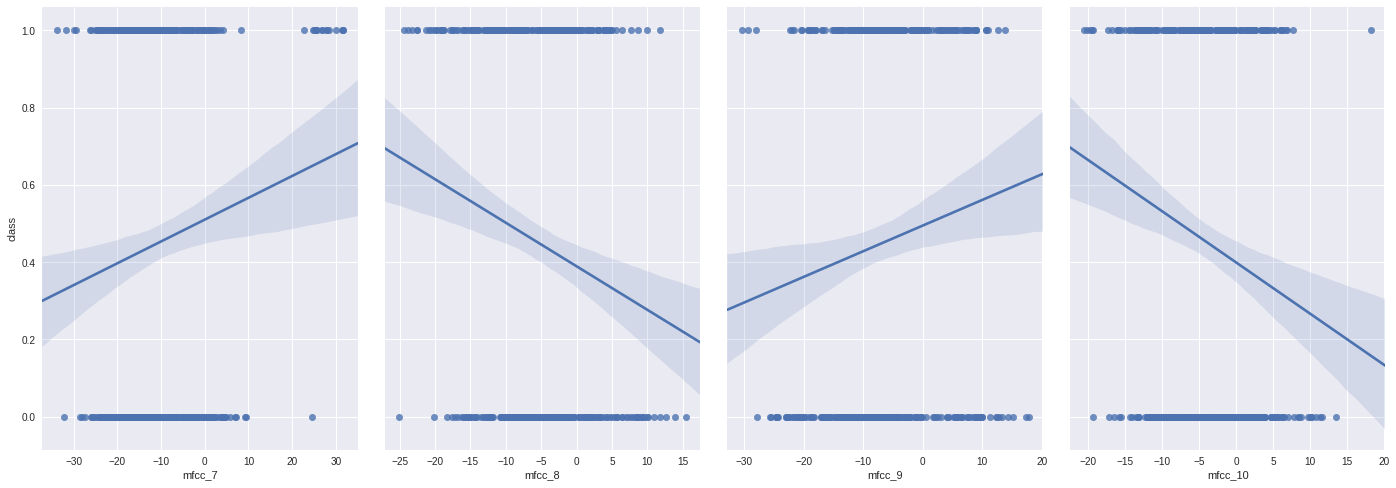

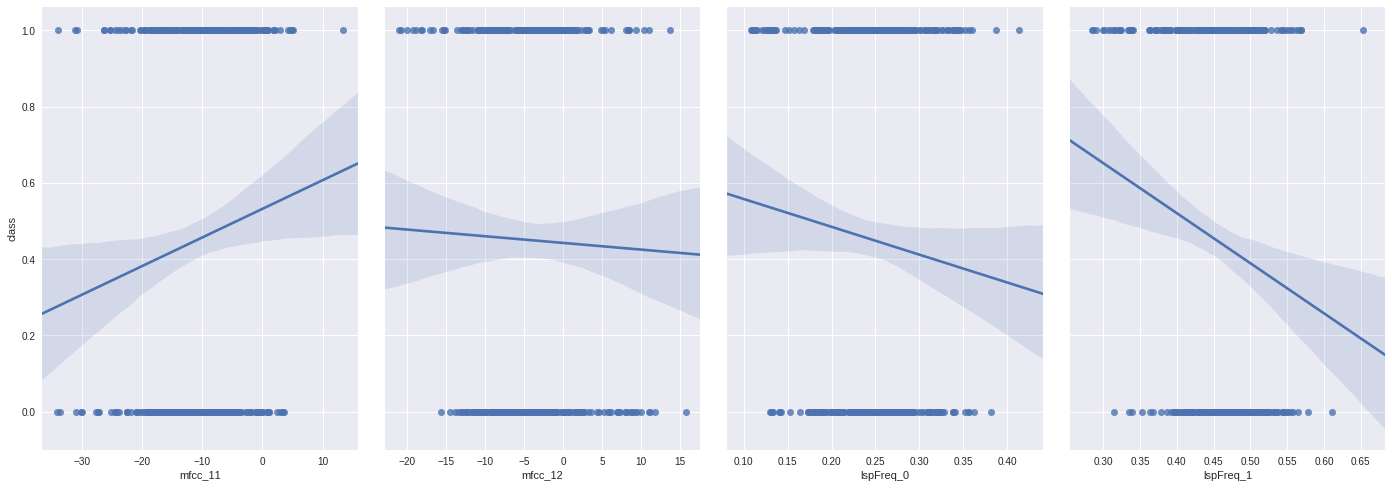

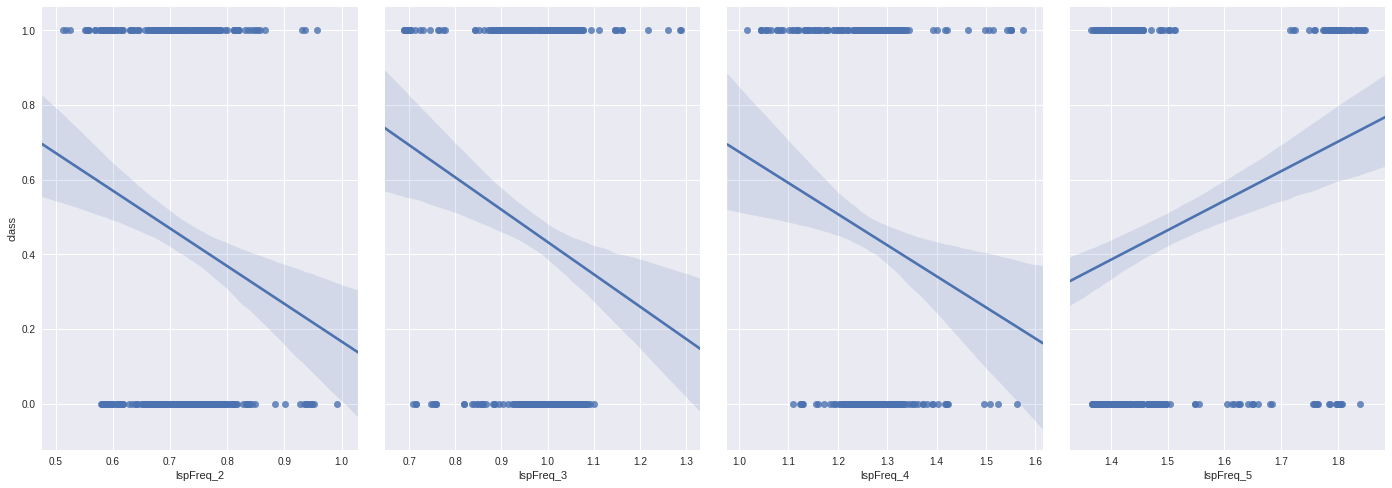

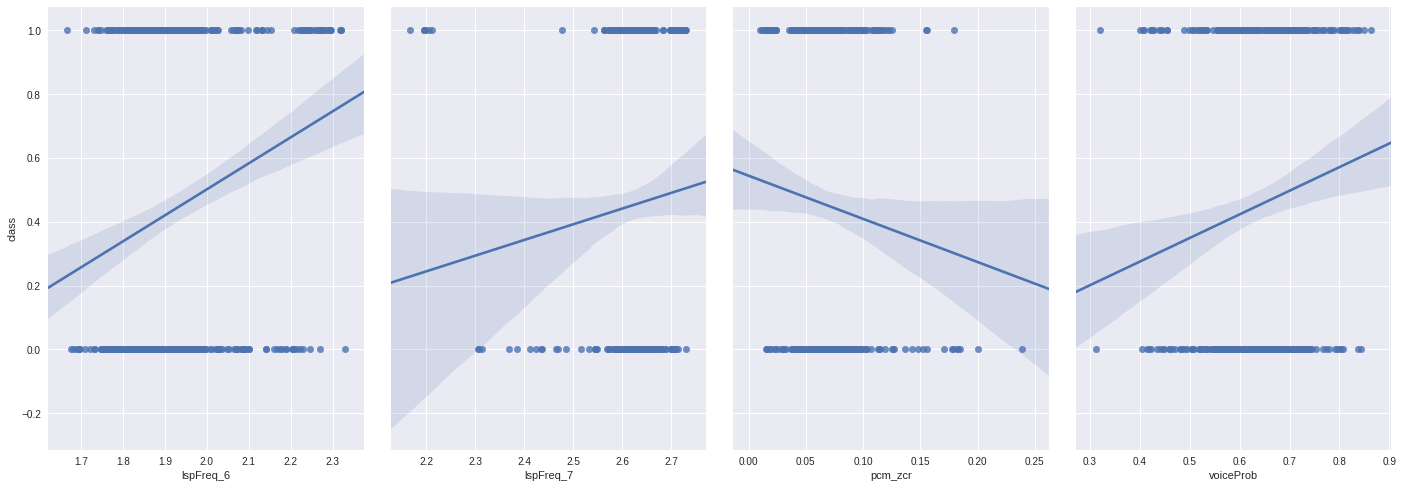

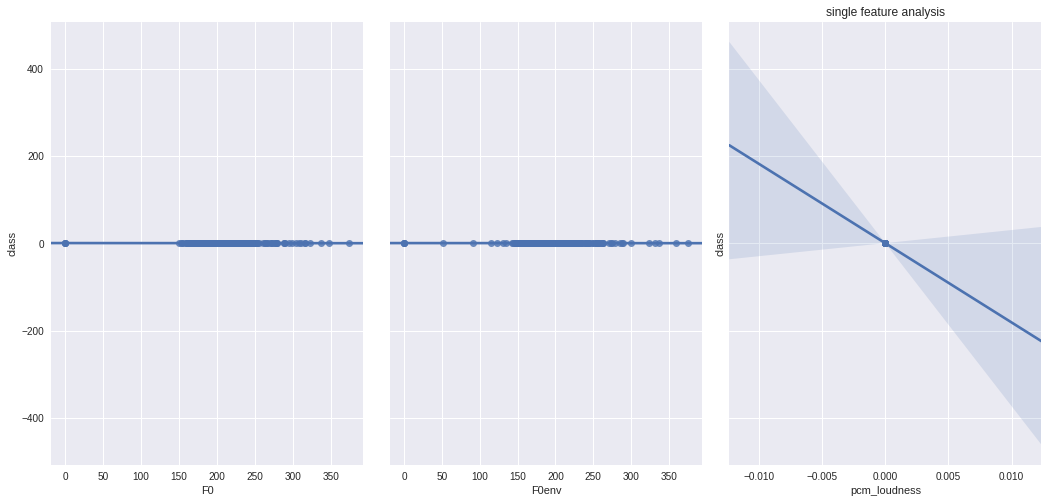

AttributeError: module 'seaborn' has no attribute 'show'

In [98]:
# import Matplotlib( scientific plotting library)
import matplotlib.pyplot as plt
# conventional way to import seaborn
import seaborn as sns


plt.plot(total_df['pcm_loudness'],total_df['class'],"x")

plt.title("single feature analysis")
plt.xlabel("pcm_loudness")
plt.ylabel("class")

# visualize the relationship between the features and the response using scatterplots
#plt.scatter(X_train, y_train, alpha=0.5)
plt.show()


sns.pairplot(total_df, x_vars=["pcm_intensity","pcm_loudness","mfcc_1","mfcc_2"], y_vars='class', size=7, aspect=0.7, kind='reg')
sns.pairplot(total_df, x_vars=["mfcc_3","mfcc_4","mfcc_5","mfcc_6"], y_vars='class', size=7, aspect=0.7, kind='reg')
sns.pairplot(total_df, x_vars=["mfcc_7","mfcc_8","mfcc_9","mfcc_10"], y_vars='class', size=7, aspect=0.7, kind='reg')
sns.pairplot(total_df, x_vars=["mfcc_11","mfcc_12","lspFreq_0","lspFreq_1"], y_vars='class', size=7, aspect=0.7, kind='reg')
sns.pairplot(total_df, x_vars=["lspFreq_2","lspFreq_3","lspFreq_4","lspFreq_5"], y_vars='class', size=7, aspect=0.7, kind='reg')
sns.pairplot(total_df, x_vars=["lspFreq_6","lspFreq_7","pcm_zcr","voiceProb"], y_vars='class', size=7, aspect=0.7, kind='reg')
sns.pairplot(total_df, x_vars=["F0","F0env","pcm_RMSenergy"], y_vars='class', size=7, aspect=0.7, kind='reg')
sns.show()




